In [269]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, HTML
import warnings
import folium
import json
warnings.filterwarnings('ignore')

First we load the data

In [270]:
panama_entity = pd.read_csv('./Data/panama_papers.nodes.entity.csv')

In [271]:
## Any duplicated row?
panama_entity[panama_entity.duplicated()==True].shape[0]
# no duplicate row

## Features:
panama_entity.columns

## Convert feature:'n.incorporation_date' to type date
panama_entity['n.incorporation_date'] = pd.to_datetime(panama_entity['n.incorporation_date'])
# this conversion is essential, it let us do sorting. 

* **Dataset Size:**
    - rows: 213634
    - features: 18



* **'labels(n)':** "Entity"
* **'n.valid_until':** 'The Panama Papers data is current through 2015'
* **'n.country_codes':** 159 countries'code (exp: HKG for Hong Kong)
* **'n.countries':** 159 countries'fullname 
* **'n.node_id':** node'id
* **'n.sourceID':** 'Panama Papers'
* **'n.address':** 18602 adress
* **'n.name':** 206525 names
* **'n.jurisdiction_description':** 21 jurisdictions'name

In [272]:
panama_entity['n.jurisdiction_description'].unique()

array(['Samoa', 'Panama', 'Nevada', 'United Kingdom', 'Singapore',
       'Ras Al Khaimah', 'Isle Of Man', 'British Anguilla', 'Seychelles',
       'Niue', 'Uruguay', 'British Virgin Islands', 'Hong Kong',
       'New Zealand', 'Bahamas', 'Cyprus', 'Malta', 'Belize', 'Jersey',
       'Wyoming', 'Costa Rica'], dtype=object)

* **'n.service_provider':** 'Mossack Fonseca'
* **'n.jurisdiction':** 21 jurisdictions'code
* **'n.closed_date':** NaN  
* **'n.incorporation_date':** 9493 incorporation'date between ['1936','2015']
* **'n.ibcRUC':** 120046 
* **'n.type':** NaN
* **'n.status':** Status 
* **'n.company_type':** NaN
* **'n.note':** Notes

We make some plot to help us understand the data.

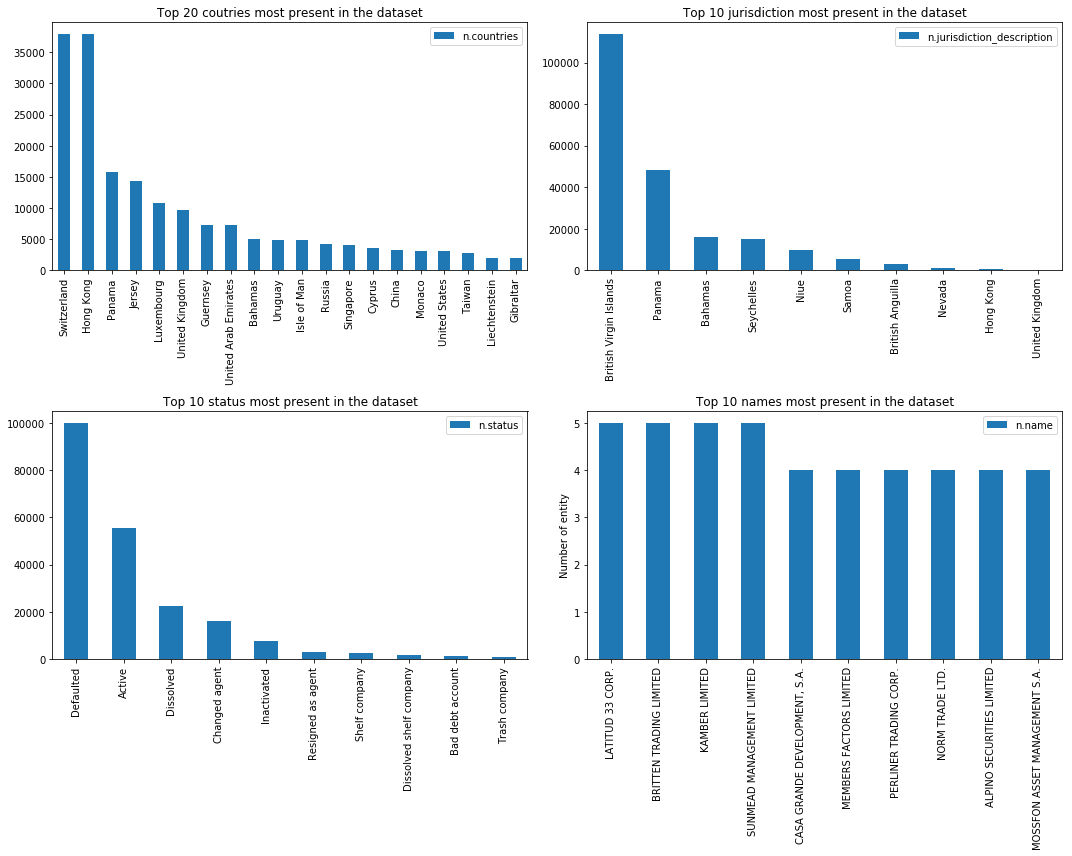

In [273]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,12))


countries = pd.DataFrame(panama_entity['n.countries'].value_counts())
countries[:20].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0,0])
plt.ylabel('Number of entity')

jurisdiction = pd.DataFrame(panama_entity['n.jurisdiction_description'].value_counts())
jurisdiction[:10].plot(kind='bar',title='Top 10 jurisdiction most present in the dataset',ax=axes[0,1])
plt.ylabel('Number of entity')

status = pd.DataFrame(panama_entity['n.status'].value_counts())
status[:10].plot(kind='bar',title='Top 10 status most present in the dataset',ax=axes[1,0])
plt.ylabel('Number of entity')

names = pd.DataFrame(panama_entity['n.name'].value_counts())
names[:10].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[1,1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

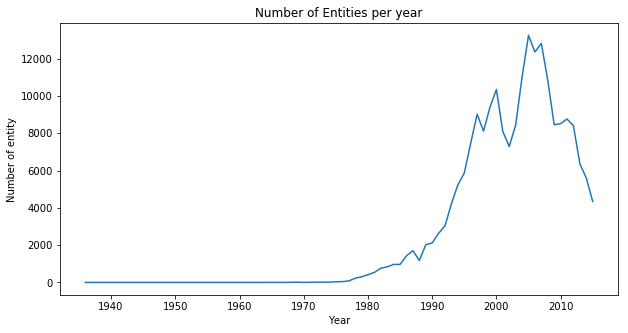

In [274]:
year = pd.DataFrame(panama_entity['n.incorporation_date'].dropna().dt.year.astype(int).value_counts())
plt.figure(figsize=(10,5))
plt.plot(year['n.incorporation_date'].sort_index())
plt.xlabel('Year')
plt.ylabel('Number of entity')
plt.title('Number of Entities per year')
plt.show()

** At year 2005, there was almost 13246 entities but something happened which decreased number of entities after this year  **

In [275]:
evolution_feature_year = panama_entity[['n.incorporation_date','n.countries','n.jurisdiction_description','n.status']]
evolution_feature_year.dropna(subset = ['n.incorporation_date'], inplace=True)
evolution_feature_year['n.incorporation_date'] = evolution_feature_year['n.incorporation_date'].dt.year.astype(int)
evolution_feature_year['count'] = 1

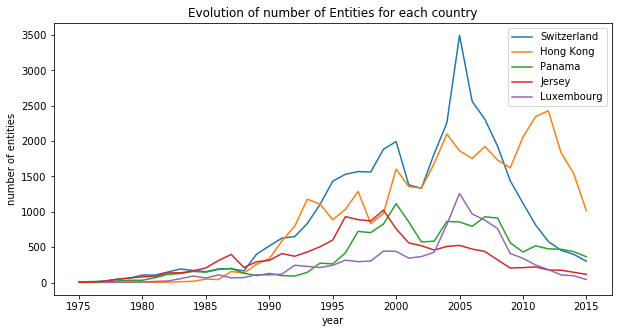

In [276]:
top5_countries = countries[:5].index.tolist()
countries_year = evolution_feature_year[evolution_feature_year['n.countries'].isin(top5_countries)][['n.incorporation_date','n.countries','count']]
countries_year = countries_year.groupby(['n.incorporation_date','n.countries']).count().reset_index()

plt.figure(figsize=(10,5))
for country in top5_countries:
    data = countries_year[countries_year['n.countries']==country]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_countries)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each country')
plt.show()

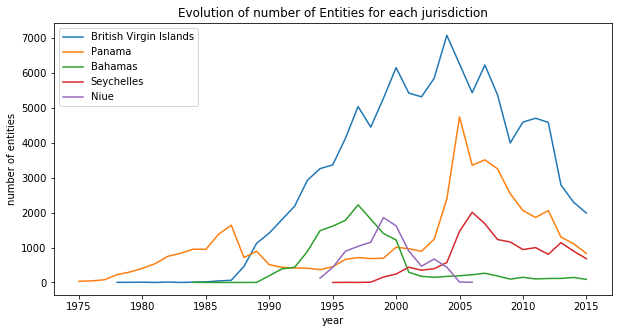

In [277]:
top5_jurisdiction = jurisdiction[:5].index.tolist()
jurisdiction_year = evolution_feature_year[evolution_feature_year['n.jurisdiction_description'].isin(top5_jurisdiction)][['n.incorporation_date','n.jurisdiction_description','count']]
jurisdiction_year = jurisdiction_year.groupby(['n.incorporation_date','n.jurisdiction_description']).count().reset_index()

plt.figure(figsize=(10,5))
for jd in top5_jurisdiction:
    data = jurisdiction_year[jurisdiction_year['n.jurisdiction_description']==jd]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_jurisdiction)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each jurisdiction')
plt.show()

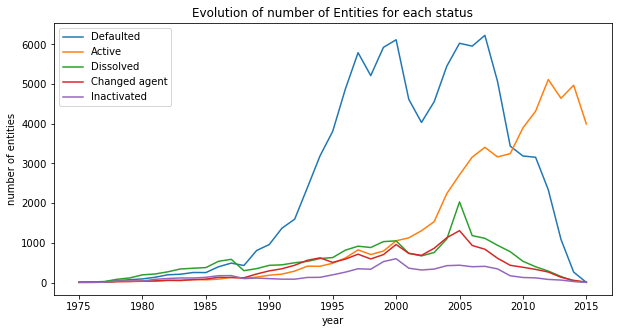

In [278]:
top5_status = status[:5].index.tolist()
status_year = evolution_feature_year[evolution_feature_year['n.status'].isin(top5_status)][['n.incorporation_date','n.status','count']]
status_year = status_year.groupby(['n.incorporation_date','n.status']).count().reset_index()

plt.figure(figsize=(10,5))
for st in top5_status:
    data = status_year[status_year['n.status']==st]
    data = data[data['n.incorporation_date']>=1975]
    plt.plot(data['n.incorporation_date'],data['count'])

plt.legend(top5_status)
plt.xlabel('year')
plt.ylabel('number of entities')
plt.title('Evolution of number of Entities for each status')
plt.show()

## Officer

In [279]:
panama_officer = pd.read_csv('./Data/panama_papers.nodes.officer.csv')

In [280]:
# no duplicated row
panama_officer[panama_officer.duplicated()==True].shape[0]

0

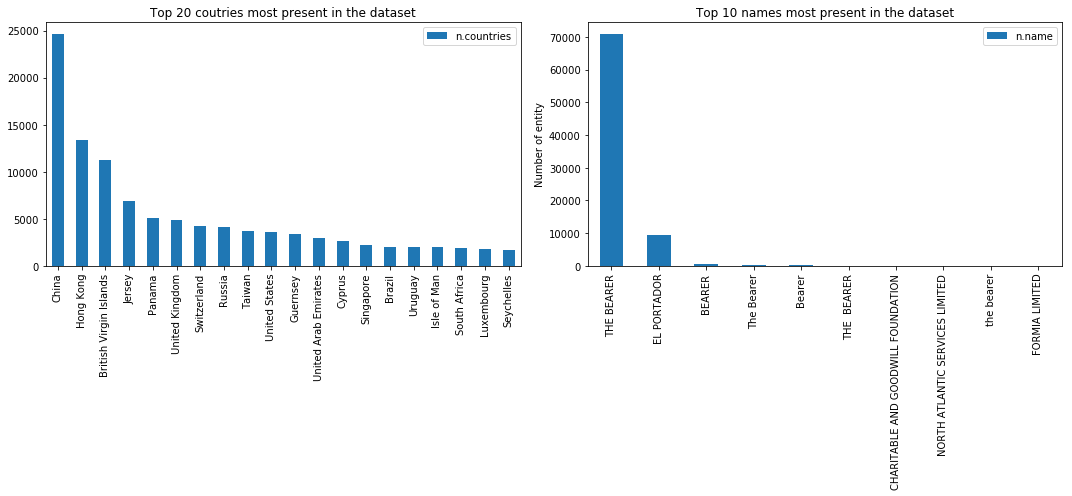

In [281]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))


countries = pd.DataFrame(panama_officer['n.countries'].value_counts())
countries[:20].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0])
plt.ylabel('Number of entity')

names = pd.DataFrame(panama_officer['n.name'].value_counts())
names[:10].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

**The second plot is showing something weird with names "BEARER" & "EL PORTADOR" which lead us to some interresting facts...**

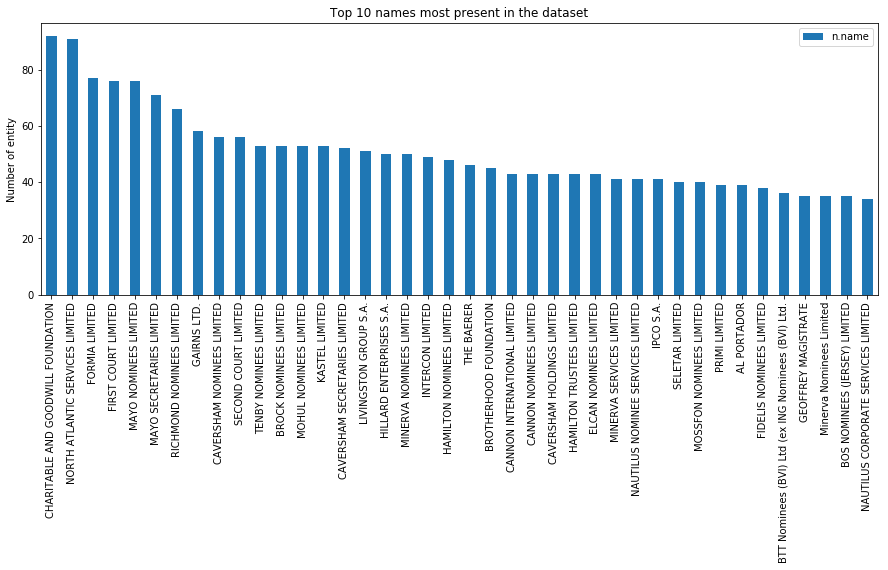

In [282]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5), squeeze=False)

names = pd.DataFrame(panama_officer[panama_officer['n.name'].str.contains('bearer|EL PORTADOR', case=False) == False ]['n.name'].value_counts())
names[:40].plot(kind='bar',title='Top 10 names most present in the dataset',ax=axes[0,0])
plt.ylabel('Number of entity')

plt.show()

In [283]:
pd.DataFrame(panama_officer[panama_officer['n.name'].str.contains('bearer', case=False) == True ]['n.name'].unique(),columns=['Names']).head()

,Names
0,THE BEARER
1,THE BEARER (MR. PAUL SPECK)
2,THE BEARER (EURO)
3,BEARER
4,the bearer


## Intermediary 

In [284]:
panama_intermediary = pd.read_csv('./Data/panama_papers.nodes.intermediary.csv')

In [285]:
# no duplicated row
panama_intermediary[panama_intermediary.duplicated()==True].shape[0]

0

In [286]:
panama_intermediary.shape

(14110, 18)

In [287]:
panama_intermediary.head(n=2)

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Intermediary""]",The Panama Papers data is current through 2015,ZAF,South Africa,11000001,Panama Papers,MICHAEL PAPAGEORGE; MR. 106 NICHOLSON STREET B...,"MICHAEL PAPAGEORGE, MR.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN
1,"[""Intermediary""]",The Panama Papers data is current through 2015,LIE,Liechtenstein,11000002,Panama Papers,NaN,CORFIDUCIA ANSTALT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACTIVE,NaN,NaN


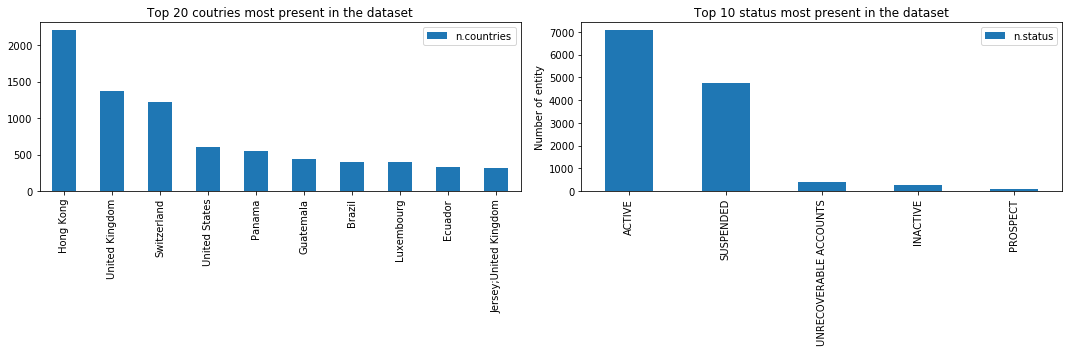

In [288]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))


countries = pd.DataFrame(panama_intermediary['n.countries'].value_counts())
countries[:10].plot(kind='bar',title='Top 20 coutries most present in the dataset',ax=axes[0])
plt.ylabel('Number of entity')

status = pd.DataFrame(panama_intermediary['n.status'].value_counts())
status[:5].plot(kind='bar',title='Top 10 status most present in the dataset',ax=axes[1])
plt.ylabel('Number of entity')

plt.tight_layout()

plt.show()

In [289]:
names = pd.DataFrame(panama_intermediary['n.name'].value_counts())
names[:4]

,n.name
MARIA CAROLINA RESTREPO CAÑAVERA,2
NAUTILUS TRUST COMPANY LIMITED,2
FIDSERVE SA,2
CARLES-BARRAZA ABOGADOS,2


In [290]:
geo_data = countries.reset_index()
geo_data.columns =['Country','count']
geo_data = geo_data[~geo_data['Country'].str.contains(';')]
geo_data = geo_data[:50]

In [291]:
world_geo_path = './data/map.json'

with open(world_geo_path) as json_file:
    json_data = json.load(json_file)
countries_geo = pd.DataFrame(json_data) 
countries_geo['x'] = (countries_geo['north'].astype(float) + countries_geo['south'].astype(float)) /2
countries_geo['y'] = (countries_geo['east'].astype(float) + countries_geo['west'].astype(float)) /2
countries_geo = countries_geo[['country','x','y']]
countries_geo.set_index('country',inplace=True)

In [292]:
world_map = folium.Map([20,0], tiles='cartodbpositron', zoom_start=2)

for i in range(0,len(geo_data)):
    country = geo_data.iloc[i]['Country']
    folium.CircleMarker(
      location=[countries_geo.ix[country]['x'], countries_geo.ix[country]['y']],
      popup=country+": "+str(geo_data.iloc[i]['count']),
      radius= geo_data.iloc[i]['count'].astype(float)/50,
      color='crimson',
      fill=True,
      fill_color='crimson'
        
   ).add_to(world_map)
world_map

## Adress

In [293]:
panama_adress = pd.read_csv('./Data/panama_papers.nodes.address.csv')

In [294]:
# no duplicated row
panama_adress[panama_adress.duplicated()==True].shape[0]

0

In [295]:
panama_adress.shape

(93454, 18)

In [296]:
panama_adress.head(n=2)

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Address""]",The Panama Papers data is current through 2015,SGP,Singapore,14000001,Panama Papers,-\t27 ROSEWOOD DRIVE #16-19 SINGAPORE 737920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[""Address""]",The Panama Papers data is current through 2015,KAZ,Kazakhstan,14000002,Panama Papers,"""Almaly Village"" v.5, Almaty Kazakhstan",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Edges 

In [297]:
panama_edges = pd.read_csv('./Data/panama_papers.edges.csv')

In [298]:
## Duplicated row: 8
panama_edges.drop(panama_edges[panama_edges.duplicated()==True].index,inplace=True)

* **Dataset Size:**
    * relations: 674094 
    * features: 7


* ** 'node_1':**  nodeId 1
* ** 'node_2':** nodeId 2
* ** 'r.sourceID':** Panama Papers
* ** 'r.valid_until':** The Panama Papers data is current through 2015
* **'rel_type': **relation type

In [299]:
panama_edges['rel_type'].unique()

array(['registered_address', 'intermediary_of', 'officer_of'], dtype=object)

In [300]:
panama_edges.head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
0,10000035,registered_address,14095990,Panama Papers,NaN,NaN,NaN
1,10000044,registered_address,14091035,Panama Papers,NaN,NaN,NaN
2,10000055,registered_address,14095990,Panama Papers,NaN,NaN,NaN
3,10000064,registered_address,14091429,Panama Papers,NaN,NaN,NaN
4,10000089,registered_address,14098253,Panama Papers,NaN,NaN,NaN


In [301]:
weird_date  = panama_edges['r.start_date'].dropna().apply(lambda x: x.split('-')[2]).astype(int) < 1900
index_weird_date = weird_date [weird_date  == True].index
panama_edges.ix[index_weird_date].head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
228844,12010651,officer_of,10034573,Panama Papers,The Panama Papers data is current through 2015,18-JUN-0082,07-APR-2005
229514,12011199,officer_of,10034573,Panama Papers,The Panama Papers data is current through 2015,18-JUN-0082,07-APR-2005
232296,12013401,officer_of,10180308,Panama Papers,The Panama Papers data is current through 2015,04-JAN-0200,25-JUN-2001
239696,12019679,officer_of,10026442,Panama Papers,The Panama Papers data is current through 2015,28-OCT-0200,NaN
246608,12025977,officer_of,10192685,Panama Papers,The Panama Papers data is current through 2015,27-MAY-0202,28-SEP-2010


In [302]:
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0012','2012')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0014','2014')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0003','2003')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0082','1982')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0200','2000')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0202','2002')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0203','2003')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2500','2005')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('1194','1994')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0199','1999')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0015','2015')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0009','2009')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0006','2006')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0201','2001')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0095','1995')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0004','2004')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0213','2013')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0096','1996')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0214','2014')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0011','2011')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('0206','2006')

# We also checked the incoherence between start_date and end_date,
#for exp: 'r.start_date': 18-MAR-2019 & 'r.end_date': 06-OCT-2009 
#         means that start_date was probably in year 2009 instead of 2019
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2088','2008')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2019','2009')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2020','2002')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2099','2009')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2201','2001')
panama_edges['r.start_date']  = panama_edges['r.start_date'].str.replace('2205','2005')

In [303]:
weird_date  = panama_edges['r.end_date'].dropna().apply(lambda x: x.split('-')[2]).astype(int) < 1900
index_weird_date = weird_date [weird_date  == True].index
panama_edges.ix[index_weird_date].head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
271446,12048615,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271447,12048616,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271467,12048617,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271468,12048618,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009
271469,12048619,officer_of,10150924,Panama Papers,The Panama Papers data is current through 2015,11-JUN-2002,06-NOV-0009


In [304]:
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0213','2013')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0206','2006')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0012','2012')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0200','2000')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0201','2001')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0015','2015')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0199','1999')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0208','2008')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0006','2006')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0009','2009')
panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('0213','2013')

panama_edges['r.end_date']  = panama_edges['r.end_date'].str.replace('2209','2009')

In [305]:
## Convert feature:'r.start_date' & 'r.end_date' to type date
panama_edges['r.start_date'] = pd.to_datetime(panama_edges['r.start_date'])
panama_edges['r.end_date'] = pd.to_datetime(panama_edges['r.end_date'])

   * ** 'r.star_date':** years between ['1957','2015']
   * ** 'r.end_date':** years beatween ['1959','2020']

# Merging all data

In [306]:
panama_nodes = pd.concat([panama_entity,panama_intermediary,panama_officer,panama_adress])

In [307]:
panama_nodes.head(n=2)

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
0,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000001,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"TIANSHENG INDUSTRY AND TRADING CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,2006-03-23,25221,NaN,Defaulted,NaN,NaN
1,"[""Entity""]",The Panama Papers data is current through 2015,HKG,Hong Kong,10000002,Panama Papers,ORION HOUSE SERVICES (HK) LIMITED ROOM 1401; 1...,"NINGBO SUNRISE ENTERPRISES UNITED CO., LTD.",Samoa,Mossack Fonseca,SAM,NaN,2006-03-27,25249,NaN,Defaulted,NaN,NaN


* **node_id** that start with/refere to:
    * 10: Entity
    * 11: Intermediary
    * 12 & 15: Officer
    * 14: Adress

In [308]:
panama_edges.head()

,node_1,rel_type,node_2,r.sourceID,r.valid_until,r.start_date,r.end_date
0,10000035,registered_address,14095990,Panama Papers,NaN,NaT,NaT
1,10000044,registered_address,14091035,Panama Papers,NaN,NaT,NaT
2,10000055,registered_address,14095990,Panama Papers,NaN,NaT,NaT
3,10000064,registered_address,14091429,Panama Papers,NaN,NaT,NaT
4,10000089,registered_address,14098253,Panama Papers,NaN,NaT,NaT


## Some mining over morocco (draft)

In [309]:
#panama_edges[panama_edges['rel_type'] == 'intermediary_of' ]

In [310]:
morocco_nodes = panama_nodes[panama_nodes['n.countries']=='Morocco']
morocco_nodes.head(n=2)

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
21216,"[""Entity""]",The Panama Papers data is current through 2015,MAR,Morocco,10021401,Panama Papers,BASILEUS HOLDINGS OFFSHORE 183 AVENUE PRINCE H...,VINTAGE FINANCE S.A.,Seychelles,Mossack Fonseca,SEY,NaN,2008-03-12,046746,NaN,Active,NaN,NaN
23581,"[""Entity""]",The Panama Papers data is current through 2015,MAR,Morocco,10023779,Panama Papers,BASILEUS HOLDINGS OFFSHORE 183 AVENUE PRINCE H...,ORANGEGREEN International Trading Limited,Seychelles,Mossack Fonseca,SEY,NaN,2009-01-20,058193,NaN,Active,NaN,NaN


In [311]:
morocco_nodes[morocco_nodes['labels(n)']=='["Officer"]']['n.name'].unique()

array(['SAAD BEKKARI', 'Max Metral', 'VALLEY ELECTRIC HOLDING CORPORATION',
       'JAMAL BENSSY', 'MRS. SIMONE ROUGE POITEVIN',
       'BASILEUS HOLDING OFFSHORE SARL AU',
       'BASILEUS HOLDING OFFSHORE SARL',
       'Basileus Holding Offshore Sarl AU',
       'BASILEUS HOLDINGS OFFSHORE SARL', 'FREDERICK MORELAND JR',
       'Mr.Sandro Benati', 'Mr.David Houphouet-Boigny', 'CHARLES FLATHER',
       'NIZAR  AL NAKEEB', 'KARIM DAMIR', 'VIRGINIA WOOSTER',
       'Nizar Al-Nakeeb', 'MOISES LEVY', 'PANG YAN', 'TANG BIN',
       'Mrs. Hiba Isam Wasef Jaber', 'Mrs. Mona Isam Wasef Jaber',
       'Mrs. Farah Isam Wasef Jaber', 'Mrs. Maha Z. H. Alsaifi',
       'Mr. Osama Isam Wasef Jaber', 'DAKIR BERRADA', 'SOFIA AMOR SAADANI',
       'SOFIA SAADANI AMOR', 'MICHAEL E. BLOOM', 'QI DAFENG',
       'Easil Land Ltd.', 'YAN LEBAU', 'CATHERINE GUEZ',
       'JACQUELINE MATHIAS', 'SECURITIES HOUSE NOMINEES INC.',
       'Omar Mouline', 'MRS. BEN-BRAHIM', 'MRS. ZINA NIZAR AL-NAKEEB',
       'MRS 

In [313]:
panama_nodes[panama_nodes['n.name']=='Mounir Majidi']

,labels(n),n.valid_until,n.country_codes,n.countries,n.node_id,n.sourceID,n.address,n.name,n.jurisdiction_description,n.service_provider,n.jurisdiction,n.closed_date,n.incorporation_date,n.ibcRUC,n.type,n.status,n.company_type,n.note
238394,"[""Officer""]",The Panama Papers data is current through 2015,NaN,NaN,15006301,Panama Papers,NaN,Mounir Majidi,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,Record manually added from leaked documents
